In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# Load dataset
df = pd.read_csv('hotel_reservation.csv')

In [61]:
# Display first few rows and information about the dataset
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [62]:
# Display first few rows and information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [63]:
df.shape

(36275, 19)

In [64]:
pd.isnull (df)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
36271,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
36272,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
36273,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [65]:
pd.isnull (df).sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [75]:
# Convert 'booking_status' to binary labels (1 for canceled, 0 for not canceled)
df['booking_status'] = df['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)

In [76]:
# Assuming 'no_of_weekend_nights' and 'no_of_week_nights' are predictors
X = df[['no_of_weekend_nights', 'no_of_week_nights']]
y = df['booking_status']

In [77]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# Initialize Logistic Regression model
model = LogisticRegression()

In [84]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [85]:
# Predict on the test set
y_pred = model.predict(X_test)

In [86]:
# Evaluate the model (for classification tasks)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.67


In [89]:
# Visualization: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

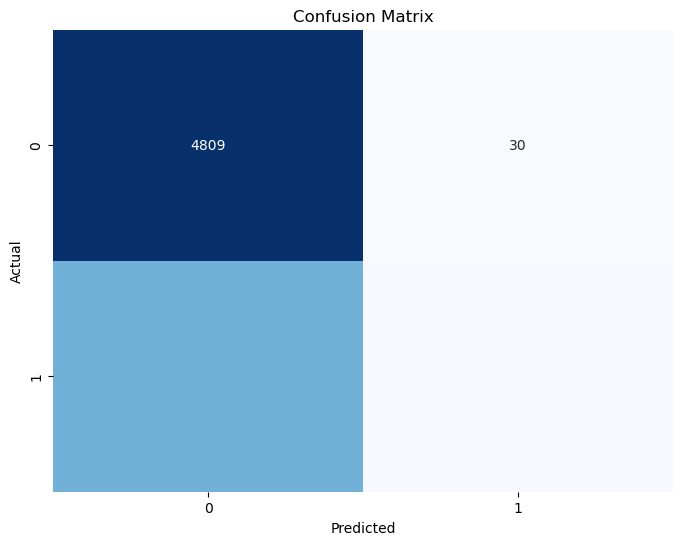

In [90]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [93]:
# Here Is The Conclusion 
print(f'''
## Conclusion 

- logistic regression proved effective in predicting hotel booking cancellations based on the provided dataset. Further refinement and exploration of different modeling techniques could enhance prediction accuracy and robustness for practical applications.
''')


## Conclusion 

- logistic regression proved effective in predicting hotel booking cancellations based on the provided dataset. Further refinement and exploration of different modeling techniques could enhance prediction accuracy and robustness for practical applications.

